### 条状邻接矩阵
用时空流量数据做图学习经常会得到条状邻接矩阵图，明显的垂直条+水平条。因此关注这种邻接矩阵对应的图。

下面的代码近似生成了条状邻接矩阵的拓扑图和度分布。拓扑呈现“枢纽—辐射网络”特点，多枢纽，多辐射，辐射之间几乎不相连，辐射都与枢纽相连接，枢纽之间相连接。度类似于二八分布。

物理意义上，可能的解释是，枢纽节点对应人口密集区域，辐射节点对应人口稀疏区域。人口流向是稀疏区域与密集区域之间的流动+密集区域之间流动，而不在稀疏区域之间流动。

从度分布上来说接近于BA图。后面用BA图试了一下，发现没有这种条状结构，只是度分布有点类似。

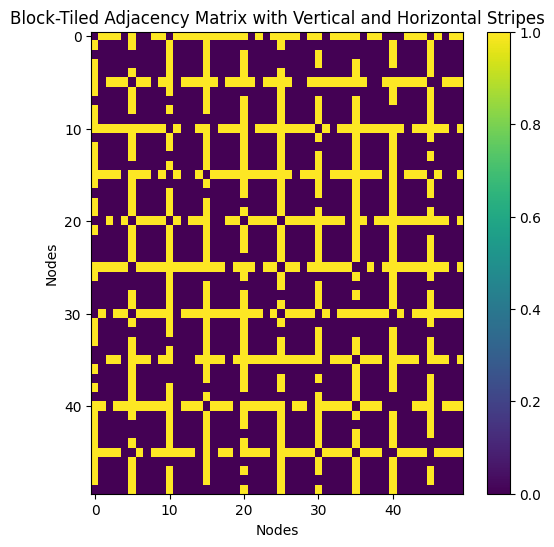

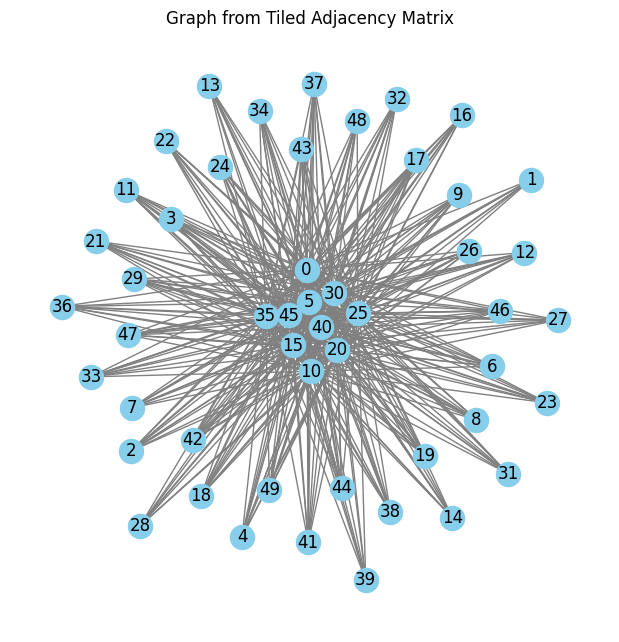

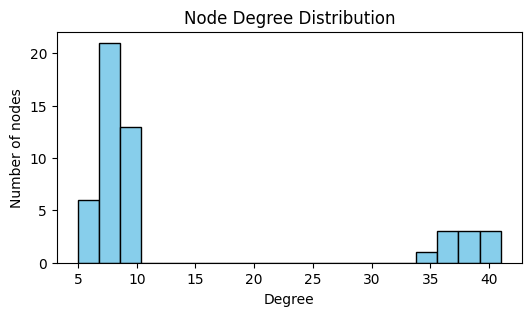

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 设置每个块的尺寸和重复次数
block_size = 5   # 每个块的行数和列数
n_blocks = 10 # 在行和列方向上分别重复的块数
half = block_size // 4

# 构造竖直条带：每一行前半部分全为1，后半部分全为0
vertical = np.concatenate([np.ones((block_size, half)),
                           np.zeros((block_size, block_size - half))], axis=1)

# 构造水平条带：前半行全为1，后半行全为0
horizontal = np.concatenate([np.ones((half, block_size)),
                             np.zeros((block_size - half, block_size))], axis=0)

# 取并集：如果某个位置在竖直或水平模式下为1，则该位置为1
B = np.maximum(vertical, horizontal)

# 利用 np.tile 重复 B，生成整个邻接矩阵 A
A = np.tile(B, (n_blocks, n_blocks))
np.fill_diagonal(A, 0)
p = 0.2  # 20%的概率置零
A[np.random.rand(*A.shape) < p] = 0

# 可视化邻接矩阵
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="viridis", aspect="auto")
plt.title("Block-Tiled Adjacency Matrix with Vertical and Horizontal Stripes")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.colorbar()
plt.show()

# 利用 networkx 可视化图拓扑
G = nx.from_numpy_array(A)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=300)
plt.title("Graph from Tiled Adjacency Matrix")
plt.show()

# 绘制度分布直方图
degrees = np.sum(A, axis=1)
plt.figure(figsize=(6,3))
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Node Degree Distribution")
plt.show()


节点平均度: 1.000000005147676


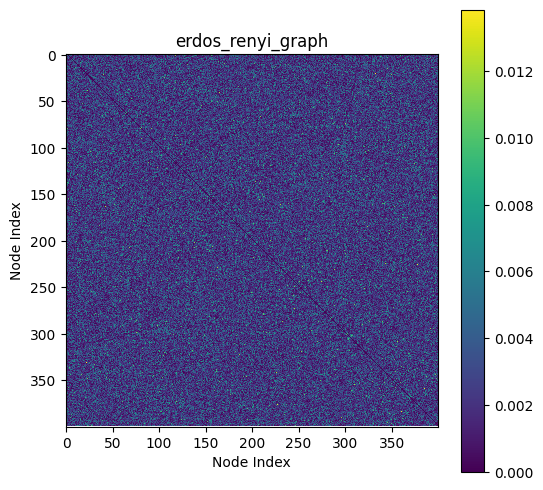

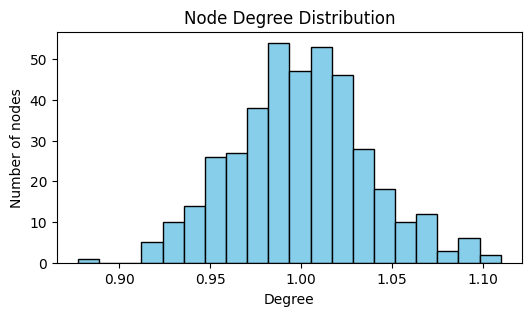

In [2]:
# 查看图 G
from models.Stgcn import *
import networkx as nx
import numpy as np
from networkx import adjacency_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 创建一个包含400个节点但没有任何边的图
# G = nx.empty_graph(20*20)
# G = nx.wheel_graph(100)
# G = nx.grid_2d_graph(20, 20) # 用的是网格图，k_average = 3.8
# G = nx.erdos_renyi_graph(400, 3.8/400, seed=42) # k_average = N*p
# G = nx.barabasi_albert_graph(200, 10, seed=42) # k_average = 2N
# 为每个节点添加自环
# for node in G.nodes():
#     G.add_edge(node, node)

adj_mx = pd.read_csv("/home/jiayin/PycharmProjects/Spatio-Temporal-Analysis-Telecom-Italia/experiments/experiments/results/GLLowPass_04131838/A.csv").to_numpy()
# adj_mx = np.load("/data/scratch/jiayin/AdjKnn5_Milan10Min_Internet.npy")
# adj_mx = nx.adjacency_matrix(G)
# L_tilde = scaled_Laplacian(adj_mx)
# L_tilde = np.diag([1] * 25)

N = adj_mx.shape[0]

# 计算平均度
average_degree = np.mean(np.sum(adj_mx, axis=1))
print(f"节点平均度: {average_degree}")

# 绘制邻接矩阵的图
plt.figure(figsize=(6, 6))
plt.imshow(adj_mx, cmap='viridis', interpolation='none')
# plt.imshow(adj_mx.todense().astype(np.float32), cmap='viridis', interpolation='none')
plt.title('erdos_renyi_graph')
plt.colorbar()
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

# 绘制度分布直方图
degrees = np.sum(adj_mx, axis=1)
plt.figure(figsize=(6,3))
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Node Degree Distribution")
plt.show()